<a href="https://colab.research.google.com/github/HJoonKwon/ml_fundamentals/blob/main/SupportVectorMachines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np 
from sklearn import datasets 
from sklearn.model_selection import train_test_split

In [8]:
def normalize(x):
  x = (x-np.mean(x, axis=0))/np.std(x, axis=0)
  return x 

In [5]:
X, y = datasets.make_blobs(
    n_samples=100,
    n_features=2,
    centers=2,
    cluster_std=1,
    random_state=42
)

# preprocess labels 
y = np.where(y==0, -1, 1)

In [10]:
X = normalize(X)
print(X.shape)
print(X[0])
print(y.shape)
print(y[0])


train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)


(100, 2)
[-1.04992757  0.94273079]
(100,)
-1


In [79]:
class SVM:

  def __init__(self, c: float = 1.0):
    self.c = c 
    self.losses = [] 
    self.w = None 
    self.b = None 
  
  def hinge_loss(self, w, b, x, y):
    max_margin_term = 0.5 * (w.transpose()@w) # 1/2 * c * ||w||^2 

    soft_penalty_term = 1 - y[:, None] * (x @ w + b)

    soft_penalty_term = np.array([max(0, penalty) for penalty in soft_penalty_term], dtype=object)
    soft_penalty_term = np.mean(soft_penalty_term, axis=0)
    loss = self.c * max_margin_term + soft_penalty_term
    return loss[0][0] 
  
  def fit(self, xs, ys, lr = 0.1, epochs = 50):
    w = np.zeros((xs.shape[1], 1))
    b = 0 

    for epoch in range(epochs):

      loss = self.hinge_loss(w, b, xs, ys)
      self.losses.append(loss)
      if epoch %5 == 0:
        print(f'epoch{epoch}: train loss = {loss}')
      
      grad_w = 0 
      grad_b = 0 

      for i, (x, y) in enumerate(zip(xs, ys)):
        if score := y * (x@w + b) > 1:
          grad_w += 0 
          grad_b += 0 
        else:
          grad_w += - (x * y).reshape(w.shape)
          grad_b += -y 
      grad_w += self.c * w
      w -= lr * grad_w  
      b -= lr * grad_b  
  
    self.w = w 
    self.b = b 
    return self.w, self.b, self.losses 

      
  def predict(self, x):
    preds = x @ self.w + self.b
    return np.sign(preds)

  def evaluate(self, y_preds, ys):
    acc = np.sum(y_preds==ys) / len(ys)
    return acc 



In [80]:
epochs = 50 
lr = 0.1 

svm = SVM(c=1.0)
w, b, losses = svm.fit(train_X, train_y, lr=lr, epochs=epochs)
preds = svm.predict(test_X)
acc = svm.evaluate(preds, test_y[:, None])
print(f'tes accuracy: {acc}')

epoch0: train loss = 1.0
epoch5: train loss = 25.311145728061085
epoch10: train loss = 8.825450809604117
epoch15: train loss = 3.077244421472046
epoch20: train loss = 1.0729687846852998
epoch25: train loss = 0.7896271365250149
epoch30: train loss = 0.9776627562663291
epoch35: train loss = 1.0319544747246805
epoch40: train loss = 0.6812006175759652
epoch45: train loss = 0.8328714955900083
tes accuracy: 1.0


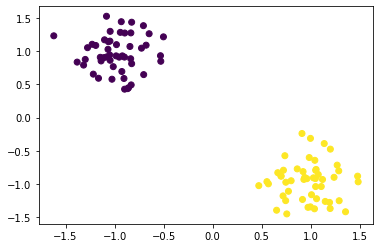

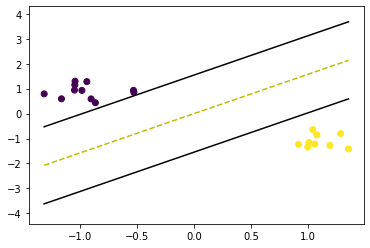

In [83]:
import matplotlib.pyplot as plt 

# Visualizing the scatter plot of the dataset
def visualize_dataset(X, y):
    plt.scatter(X[:, 0], X[:, 1], c=y)


# Visualizing SVM
def visualize_svm(X, y):

    def get_hyperplane_value(x, w, b, offset):
        return -(w[0] * x + b + offset) / w[1]

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)

    x0_1 = np.amin(X[:, 0])
    x0_2 = np.amax(X[:, 0])

    x1_1 = get_hyperplane_value(x0_1, w, b, 0)
    x1_2 = get_hyperplane_value(x0_2, w, b, 0)

    x1_1_m = get_hyperplane_value(x0_1, w, b, -1)
    x1_2_m = get_hyperplane_value(x0_2, w, b, -1)

    x1_1_p = get_hyperplane_value(x0_1, w, b, 1)
    x1_2_p = get_hyperplane_value(x0_2, w, b, 1)

    ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
    ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
    ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

    x1_min = np.amin(X[:, 1])
    x1_max = np.amax(X[:, 1])
    ax.set_ylim([x1_min - 3, x1_max + 3])

    plt.show()


visualize_dataset(X, y)
visualize_svm(test_X, test_y)

## References 
- https://www.pycodemates.com/2022/10/implementing-SVM-from-scratch-in-python.html